In [203]:
import datetime as dt
import numpy as np
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data

In [204]:
from sklearn import mixture as mix

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
import talib as ta
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [206]:
#import sklearn
#print (sklearn.__version__)

In [226]:
end = dt.date.today()
start = dt.datetime(end.year-5,end.month,end.day)
df = pd.DataFrame(data.DataReader('BSE/BOM532500', 'quandl', start=start, end=end ))  #Maruti Ltd.
df

,Open,High,Low,Close,WAP,NoofShares,NoofTrades,TotalTurnover,DeliverableQuantity,DeliQtytoTradedQty,SpreadHL,SpreadCO
Date,,,,,,,,,,,,
2019-03-01,6889.00,6950.00,6833.30,6933.20,6901.690000,43479.0,4522.0,3.000784e+08,14545.0,33.45,116.70,44.20
2019-02-28,7003.25,7032.45,6801.15,6832.25,6897.800000,44679.0,4840.0,3.081868e+08,13508.0,30.23,231.30,-171.00
2019-02-27,6905.00,7047.00,6849.85,6955.20,6959.550000,61868.0,6646.0,4.305733e+08,16824.0,27.19,197.15,50.20
2019-02-26,6884.00,6974.90,6808.35,6896.30,6899.050000,51512.0,4661.0,3.553837e+08,13581.0,26.36,166.55,12.30
2019-02-25,6932.00,6984.40,6887.55,6921.45,6925.660000,45385.0,3946.0,3.143210e+08,14996.0,33.04,96.85,-10.55
2019-02-22,6844.00,6940.00,6804.75,6916.40,6891.570000,60109.0,4408.0,4.142452e+08,12957.0,21.56,135.25,72.40
2019-02-21,6860.00,6878.00,6718.30,6796.80,6782.570000,50170.0,5921.0,3.402813e+08,16558.0,33.00,159.70,-63.20
2019-02-20,6852.00,6882.65,6807.00,6848.70,6845.540000,24389.0,3555.0,1.669560e+08,6741.0,27.64,75.65,-3.30
2019-02-19,6849.95,6913.90,6778.40,6805.75,6862.910000,27817.0,3559.0,1.909057e+08,4377.0,15.73,135.50,-44.20


In [227]:
df = df[['Open', 'High', 'Low', 'Close']]
df.describe()

,Open,High,Low,Close
count,1232.000000,1232.000000,1232.000000,1232.000000
mean,5566.107427,5618.555154,5508.662622,5560.986364
std,2255.121315,2268.828001,2233.511938,2247.681656
min,1627.000000,1657.000000,1618.750000,1649.900000
25%,3675.825000,3724.212500,3639.737500,3671.112500
50%,4971.750000,5021.425000,4906.450000,4964.225000
75%,7546.387500,7587.275000,7493.025000,7534.650000
max,9970.000000,10000.000000,9730.050000,9820.350000


In [228]:
#Spliting the data 80% for testing and 20% for training
n = 10
t = 0.8
split = int(t*len(df))
print(split)

985


In [229]:
# print(df['High'][:split])
# print(df['High'].shift(1))
#I created various technical indicators such as, RSI, SMA, ADX, Correlation, 
#Parabolic SAR, and the Return of the past 1- day on an Open to Open basis.

# df['High'] = df['High'].shift(1)
# df['Low'] = df['Low'].shift(1)
# df['Close'] = df['Close'].shift(1)
df['RSI']= ta.RSI(np.array(df['Close']), timeperiod=n)
df['SMA']= df['Close'].rolling(window=n).mean()
df['Corr']= df['SMA'].rolling(window=n).corr(df['Close'])
df['SAR']= ta.SAR(np.array(df['High']),np.array(df['Low']),0.2,0.2)
df['ADX']= ta.ADX(np.array(df['High']),np.array(df['Low']),np.array(df['Close']), timeperiod=n)
df['Return']= np.log(df['Open']/df['Open'].shift(1))

df = df.dropna()
df


c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Open,High,Low,Close,RSI,SMA,Corr,SAR,ADX,Return
Date,,,,,,,,,,
2019-02-04,6965.00,7036.70,6852.05,6968.05,44.595156,7098.170,0.301125,7249.000000,26.337896,-0.003726
2019-02-01,6655.00,7196.00,6655.00,6956.55,43.891156,7101.295,-0.134239,6655.000000,28.136958,-0.045529
2019-01-31,6599.00,6675.85,6465.65,6628.05,29.240325,7062.395,-0.340991,7196.000000,30.918580,-0.008450
2019-01-30,6541.00,6582.00,6509.80,6528.25,26.279242,7012.855,-0.274672,7196.000000,33.422039,-0.008828
2019-01-29,6495.00,6612.30,6442.05,6523.30,26.133395,6950.675,0.097751,7049.930000,36.047119,-0.007057
2019-01-28,6514.80,6601.80,6324.35,6508.55,25.661858,6883.025,0.482553,6928.354000,38.974925,0.003044
2019-01-25,7069.00,7131.00,6420.00,6516.35,26.441709,6820.045,0.647458,6324.350000,35.353652,0.081643
2019-01-24,7045.00,7099.95,7011.00,7037.40,58.643762,6795.360,0.394252,6324.350000,32.094507,-0.003401
2019-01-23,7042.00,7130.00,7020.00,7042.15,58.826337,6780.465,0.107731,6420.000000,29.434137,-0.000426


# Standard Scaler

c:\program files (x86)\python36-32\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


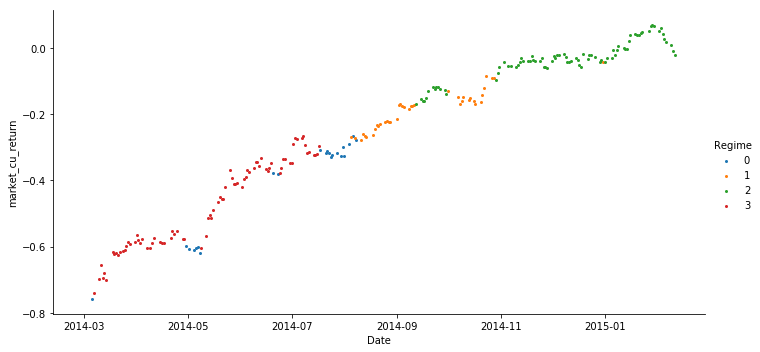

Mean for regime 0: -0.9497199583213005
Co-Variance for regime 0: 0.20632322357444594
Mean for regime 1: 0.4478648312832836
Co-Variance for regime 1: 0.24336308894204645
Mean for regime 2: 1.1201004372675893
Co-Variance for regime 2: 0.4636055161857211
Mean for regime 3: -0.8152953630165877
Co-Variance for regime 3: 0.46963500892782317


In [230]:
ss = StandardScaler()
unsup = mix.GaussianMixture(n_components=4,covariance_type='spherical', n_init=100, random_state=42)
#df = df.drop(['High','Low','Close'], axis=1)
unsup.fit(np.reshape(ss.fit_transform(df[:split]),(-1, df.shape[1])))
regime=unsup.predict(np.reshape(ss.fit_transform(df[split:]),(-1, df.shape[1])))
Regimes= pd.DataFrame(regime, columns=['Regime'],index=df[split:].index).join(df[split:], how='inner').assign(market_cu_return=df[split:].Return.cumsum()).reset_index(drop=False).rename(columns={'index':'Date'})

orders=[0,1,2,3]
fig = sns.FacetGrid(data=Regimes, hue='Regime', hue_order=orders, aspect=2, size=5)
fig.map(plt.scatter, 'Date', 'market_cu_return', s=4).add_legend()
plt.show()

for i in orders:
    print("Mean for regime %i:"%i,unsup.means_[i][0])
    print('Co-Variance for regime %i:'%i,(unsup.covariances_[i]))

# Comparitive Study

In [231]:
ss1 = StandardScaler()
columns = Regimes.columns.drop(['Regime','Date'])
Regimes[columns] = ss1.fit_transform(Regimes[columns])
Regimes['Signal'] = 0
Regimes.loc[Regimes['Return']>0, 'Signal'] = 1
Regimes.loc[Regimes['Return']<0, 'Signal'] = -1

Support Vector Regressor

In [232]:
cls = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',max_iter=-1,probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

In [233]:
split2 = int(.8*len(Regimes))

X = Regimes.drop(['Signal','Return', 'market_cu_return', 'Date'], axis=1)
y = Regimes['Signal']
cls.fit(X[:split2],y[:split2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Random Forest Regressor

In [234]:
from sklearn.ensemble import RandomForestRegressor as RFR
rfrg = RFR(max_depth=2, random_state=0, n_estimators=100)
rfrg.fit(X,y)
#print(rfrg.feature_importances_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

Linear Model - Ridge Regression

In [235]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=.5)
ridge_reg.fit(X,y)


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Linear Model - Lasso Regression

In [236]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(X,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Logistic Regression

In [237]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
logistic_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [238]:
print(len(X))
p_data = len(X)-split2
print(p_data)

228
46


In [239]:
df['Pred_Signal']=0
df.iloc[-p_data:,df.columns.get_loc('Pred_Signal')] = cls.predict(X[split2:])
print(df['Pred_Signal'][-p_data:])
df['str_ret'] = df['Pred_Signal']*df['Return'].shift(-1)

Date
2014-05-15    1
2014-05-14    1
2014-05-13    1
2014-05-12    1
2014-05-09    1
2014-05-08    1
2014-05-07    1
2014-05-06    1
2014-05-05    1
2014-05-02    1
2014-04-30    1
2014-04-29    1
2014-04-28    1
2014-04-25    1
2014-04-23   -1
2014-04-22   -1
2014-04-21   -1
2014-04-17   -1
2014-04-16   -1
2014-04-15   -1
2014-04-11   -1
2014-04-10   -1
2014-04-09   -1
2014-04-07   -1
2014-04-04   -1
2014-04-03   -1
2014-04-02    1
2014-04-01    1
2014-03-31   -1
2014-03-28   -1
2014-03-27   -1
2014-03-26   -1
2014-03-25   -1
2014-03-24    1
2014-03-22    1
2014-03-21    1
2014-03-20    1
2014-03-19    1
2014-03-18    1
2014-03-14    1
2014-03-13    1
2014-03-12    1
2014-03-11    1
2014-03-10    1
2014-03-07    1
2014-03-06    1
Name: Pred_Signal, dtype: int64


In [240]:
RFRG_pred = rfrg.predict(X[:p_data])
RFRG_pred = pd.DataFrame(data=RFRG_pred)
RFRG_pred.index = df['Pred_Signal'][1167:].index
RFRG_pred

,0
Date,
2014-05-15,0.359818
2014-05-14,0.464123
2014-05-13,0.507554
2014-05-12,0.465090
2014-05-09,0.465090
2014-05-08,0.393420
2014-05-07,0.270502
2014-05-06,-0.011610
2014-05-05,0.128325


In [241]:
RIDGE_pred = ridge_reg.predict(X[:p_data])
RIDGE_pred = pd.DataFrame(data=RIDGE_pred)
RIDGE_pred.index = df['Pred_Signal'][1167:].index
RIDGE_pred

,0
Date,
2014-05-15,-0.370255
2014-05-14,0.642730
2014-05-13,1.129551
2014-05-12,0.643889
2014-05-09,0.661747
2014-05-08,0.969939
2014-05-07,1.074007
2014-05-06,0.085060
2014-05-05,0.796112


In [242]:
LASSO_pred = lasso_reg.predict(X[:p_data])
LASSO_pred = pd.DataFrame(data=LASSO_pred)
LASSO_pred.index = df['Pred_Signal'][1167:].index
LASSO_pred

,0
Date,
2014-05-15,0.152431
2014-05-14,0.154316
2014-05-13,0.157181
2014-05-12,0.158555
2014-05-09,0.159986
2014-05-08,0.162905
2014-05-07,0.165887
2014-05-06,0.164279
2014-05-05,0.166613


In [243]:
LOGREG_pred = logistic_reg.predict(X[:p_data])
LOGREG_pred = pd.DataFrame(data=LOGREG_pred)
LOGREG_pred.index = df['Pred_Signal'][1167:].index
LOGREG_pred

,0
Date,
2014-05-15,-1
2014-05-14,1
2014-05-13,1
2014-05-12,1
2014-05-09,1
2014-05-08,1
2014-05-07,1
2014-05-06,1
2014-05-05,1


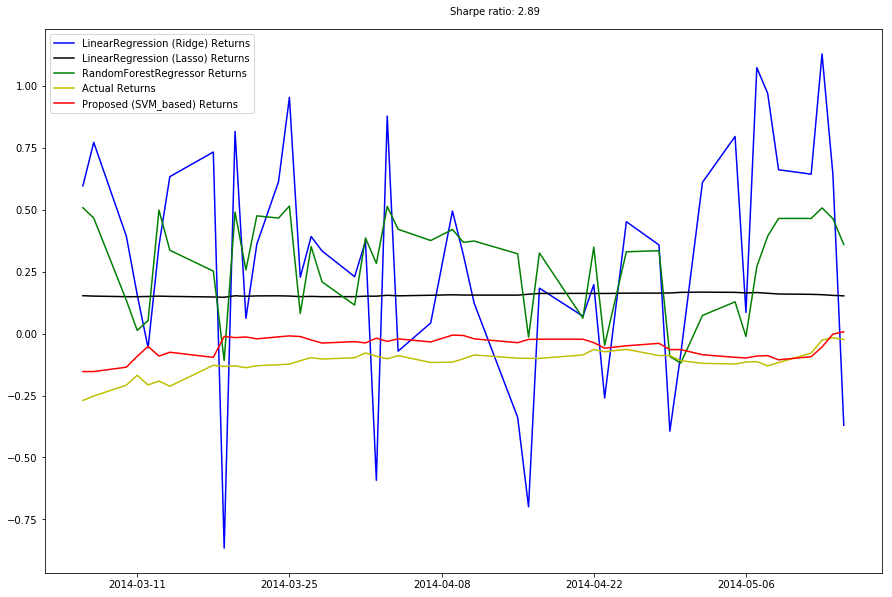

In [245]:
df['strategy_cu_return']=0
df['market_cu_return']=0
df.iloc[-p_data:,df.columns.get_loc('strategy_cu_return')] = np.nancumsum(df['str_ret'][-p_data:])
df.iloc[-p_data:,df.columns.get_loc('market_cu_return')] = np.nancumsum(df['Return'][-p_data:])
Sharpe = (df['strategy_cu_return'][-1]-df['market_cu_return'][-1])/np.nanstd(df['strategy_cu_return'][-p_data:])
df.dropna()

fig= plt.subplots(figsize = (15,10))
plt.plot(RIDGE_pred, color='b', label='LinearRegression (Ridge) Returns')
plt.plot(LASSO_pred, color='k', label='LinearRegression (Lasso) Returns')
#plt.plot(LOGREG_pred, color='m', label='LogisticRegression Returns')
plt.plot(RFRG_pred, color='g', label='RandomForestRegressor Returns')
plt.plot(df['market_cu_return'][-p_data:], color='y', label='Actual Returns')
plt.plot(df['strategy_cu_return'][-p_data:], color='r', label='Proposed (SVM_based) Returns')

plt.figtext(0.5,0.9, s='Sharpe ratio: %.2f'%Sharpe)
plt.legend(loc='best')
plt.show()